# Visualize Data Distribution & Additional Data Sampling 

 #### Principal Component Analysis (PCA), as a tool of dimensional reduction and distribution visualization in 2D

    We only use PCA as a dimension reduction (with a reduced dimension of 2) for visualization purpose, and we can directly understand the feature similarity with a 2D scattered plot with the first two PCA components. The general idea of PCA is to find the best projection of the original high-dimensional variables onto a limited number of principal components by orthogonal transformations. The input of ML regression models uses the original materials descriptors & concentration. 
    Further Information: Nature Methods, 14, 641–642 (2017).
 
 #### Latin HyperCube Sampling (LHS), as a high-dimensional peusodo random sampling of additional experimental data
    
    We use the LHS method to sample materials for experiments within the pre-defined bounds. LHS equally divides the available variable space into smaller hypercubes (e.g., chess board), and then the sampling procedure follows the rule of exclusivity (e.g., the same rows and columns of the sampled hypercubes are excluded in the subsequent round of sampling. The key advantage of LHS is that this pseudo-random sampling strategy tends to cover more divergent parameter space than random sampling. 

 #### Nearest Neighbour, as a method to find experimentally realistic materials of ammonium salts
    
    LHS samples might pick a set of descriptors that might not actually exists. We use the Nearest Neighbour method to find the cloesest materials to the LHS samples.   

 
Written by Suo Wang and Zhe Liu, Chongyang Zhi et al.

Tested with the packages as follows:
`numpy 1.21.5`
`pandas 1.4.2`
`matplotlib 3.5.1`
`shap 0.41.0`
`sklearn 1.0.2`
`GPy 1.10.0`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import the perovskite PCE data

df_exp_data = pd.read_csv('../data/experimental_data_maxPCE_ratio.csv')
df_exp_data

,Full Name,Abbreviation,smiles,Concentration (mg/mL),C atom,H atom,N atom,F atom,O atom,Ipc,...,Complexity,MolLogP,Voc(V)_mean,Jsc(mA/cm2)_mean,FF(%)_mean,PCE(%)_mean,Voc(V)_max,Jsc(mA/cm2)_max,FF(%)_max,ratio
0,n-Butylammonium iodide,n-BAI,[I-].CCCC[NH3+],5.0,4,12,1,0,0,11.245112,...,15.02,-2.97,1.080,22.23,68.99,16.59,1.120,23.33,73.43,1.060159
1,Cyclohexylmethylammonium iodide,CHMAI,[I-].[NH3+]CC1CCCCC1,5.0,7,16,1,0,0,91.367577,...,59.94,-2.19,1.050,21.89,70.54,16.28,1.080,22.96,75.57,1.061862
2,Ethylammonium iodide,EAI,[I-].CC[NH3+],5.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.070,24.50,71.70,18.88,1.090,25.62,74.04,1.063231
3,Ethylammonium iodide,EAI,[I-].CC[NH3+],7.5,2,8,1,0,0,2.754888,...,6.00,-3.75,1.090,22.40,69.38,16.84,1.110,24.56,75.72,1.059511
4,Ethylammonium iodide,EAI,[I-].CC[NH3+],10.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.080,23.14,69.40,17.41,1.100,25.88,73.39,1.069075
5,Ethylammonium iodide,EAI,[I-].CC[NH3+],12.5,2,8,1,0,0,2.754888,...,6.00,-3.75,1.090,23.05,62.95,15.86,1.100,25.48,66.76,0.972370
6,Ethylammonium iodide,EAI,[I-].CC[NH3+],15.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.100,16.55,51.51,9.45,1.140,18.37,63.52,0.693943
7,Guanidinium iodide,GAI,[I-].NC([NH3+])=N,5.0,1,6,3,0,0,3.245112,...,29.87,-4.87,1.040,21.54,68.96,15.51,1.070,23.32,76.31,0.943146
8,4-Fluoro-phenethylammonium iodide,4-F-PEAI,[I-].[NH3+]CCc1ccc(F)cc1,5.0,8,11,1,1,0,210.075617,...,197.75,-2.39,1.060,23.44,74.13,18.39,1.070,25.27,76.75,1.092291
9,2-Fluoro-phenethylammonium iodide,2-F-PEAI,[I-].[NH3+]CCc1ccccc1F,1.0,8,11,1,1,0,213.811624,...,215.00,-2.39,1.120,22.40,71.13,17.81,1.130,22.87,73.13,0.936784


In [111]:
df_exp_data.drop_duplicates('smiles','first',inplace=True) # Based on Smiles, delete data for the repeated materials 
df_exp_data.index = [i for i in range(len(df_exp_data))]
df_exp_data.head(60)

/var/folders/j8/w8372sqd3fbgsmllt2yj0ms40000gn/T/ipykernel_5952/1765498133.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  df_all_data.drop_duplicates('smiles','first',inplace=True) # Based on Smiles, delete data for the repeated materials


,Full Name,Abbreviation,smiles,Concentration (μmol/mL),C atom,H atom,N atom,F atom,O atom,Ipc,...,Complexity,MolLogP,Voc(V)_mean,Jsc(mA/cm2)_mean,FF(%)_mean,PCE(%)_mean,Voc(V)_max,Jsc(mA/cm2)_max,FF(%)_max,PCE(%)_max
0,n-Butylammonium iodide,n-BAI,[I-].CCCC[NH3+],5.0,4,12,1,0,0,11.245112,...,15.020000,-2.97000,1.110,21.91,67.56,16.30,1.120,23.33,73.43,17.86
1,Cyclohexylmethylammonium iodide,CHMAI,[I-].[NH3+]CC1CCCCC1,5.0,7,16,1,0,0,91.367577,...,59.940000,-2.19000,1.060,21.89,70.55,16.29,1.080,22.96,75.57,18.71
2,Ethylammonium iodide,EAI,[I-].CC[NH3+],5.0,2,8,1,0,0,2.754888,...,6.000000,-3.75000,1.070,24.50,71.70,18.88,1.090,25.62,74.04,20.01
3,Guanidinium iodide,GAI,[I-].NC([NH3+])=N,5.0,1,6,3,0,0,3.245112,...,29.870000,-4.87000,1.030,22.16,69.17,15.83,1.070,23.32,76.31,17.75
4,4-Fluoro-phenethylammonium iodide,4FPEAI,[I-].[NH3+]CCc1ccc(F)cc1,5.0,8,11,1,1,0,210.075617,...,197.750000,-2.39000,1.060,23.49,74.16,18.41,1.070,25.27,76.75,20.12
5,2-Fluoro-phenethylammonium iodide,2FPEAI,[I-].[NH3+]CCc1ccccc1F,1.0,8,11,1,1,0,213.811624,...,215.000000,-2.39000,1.120,22.40,71.13,17.81,1.130,22.87,73.13,18.82
6,(4-fluorophenyl)methanaminium iodide,4FBnAI,[I-].[NH3+]Cc1ccc(F)cc1,5.0,7,9,1,0,0,129.225339,...,185.300000,-2.43000,1.080,21.68,71.48,17.67,1.120,23.61,76.79,19.27
7,4-Methoxy-Phenethylammonium iodide,4MeOPEAI,[I-].COc1ccc(CC[NH3+])cc1,5.0,9,14,1,0,1,380.175800,...,210.270000,-2.52000,1.070,21.59,66.93,15.39,1.090,24.79,75.76,20.04
8,2-phenylethan-1-aminium iodide,PEAI,[I-].[NH3+]CCc1ccccc1,3.0,8,12,1,0,0,145.166537,...,162.170000,-2.53000,1.104,21.84,72.20,17.40,1.123,23.52,76.34,20.16
9,(4-(trifluoromethyl)phenyl)methanaminium iodide,4-3FMPEAI,[I-].[NH3+]Cc1ccc(cc1)C(F)(F)F,5.0,8,9,1,0,0,430.628114,...,255.090000,-1.55000,1.040,22.32,70.40,16.95,1.080,23.92,75.11,17.78


In [112]:
literature_material_data = df_exp_data.iloc[:38,4:-8]
literature_material_data

,C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,TPSA,Heavy atom,Complexity,MolLogP
0,4,12,1,0,0,11.245112,201.050,1,0,2,27.64,6,15.020000,-2.97000
1,7,16,1,0,0,91.367577,241.120,1,0,1,27.64,9,59.940000,-2.19000
2,2,8,1,0,0,2.754888,173.000,1,0,0,27.64,4,6.000000,-3.75000
3,1,6,3,0,0,3.245112,186.980,3,1,0,77.51,5,29.870000,-4.87000
4,8,11,1,1,0,210.075617,267.090,1,0,2,27.64,11,197.750000,-2.39000
5,8,11,1,1,0,213.811624,267.090,1,0,2,27.64,11,215.000000,-2.39000
6,7,9,1,0,0,129.225339,253.060,1,0,1,27.64,10,185.300000,-2.43000
7,9,14,1,0,1,380.175800,279.120,1,1,3,36.87,12,210.270000,-2.52000
8,8,12,1,0,0,145.166537,249.100,1,0,2,27.64,10,162.170000,-2.53000
9,8,9,1,0,0,430.628114,303.070,1,0,1,27.64,13,255.090000,-1.55000


In [113]:
nineteen_exp_data = df_exp_data.dropna(axis = 'rows').iloc[:,4:-8]
nineteen_exp_data

,C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,TPSA,Heavy atom,Complexity,MolLogP
0,4,12,1,0,0,11.245112,201.05,1,0,2,27.64,6,15.02,-2.97
1,7,16,1,0,0,91.367577,241.12,1,0,1,27.64,9,59.94,-2.19
2,2,8,1,0,0,2.754888,173.00,1,0,0,27.64,4,6.00,-3.75
3,1,6,3,0,0,3.245112,186.98,3,1,0,77.51,5,29.87,-4.87
4,8,11,1,1,0,210.075617,267.09,1,0,2,27.64,11,197.75,-2.39
5,8,11,1,1,0,213.811624,267.09,1,0,2,27.64,11,215.00,-2.39
6,7,9,1,0,0,129.225339,253.06,1,0,1,27.64,10,185.30,-2.43
7,9,14,1,0,1,380.175800,279.12,1,1,3,36.87,12,210.27,-2.52
8,8,12,1,0,0,145.166537,249.10,1,0,2,27.64,10,162.17,-2.53
9,8,9,1,0,0,430.628114,303.07,1,0,1,27.64,13,255.09,-1.55


In [7]:
## import pubchem database 
df_database = pd.read_csv('../data/pubchem_database.csv')
df_database

,Full Name,smiles,Concentration (μmol/mL),C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,Complexity,MolLogP
0,Benzimidazolium iodide,[I-].[nH]1c[nH+]c2ccccc12,1,7,7,2,0,0,254.268990,246.051,1,0,0,285.583893,-2.0140
1,1-phenylpent-4-en-2-aminium iodide,[I-].[NH3+]C(CC=C)Cc1ccccc1,1,11,16,1,0,0,585.384683,289.160,1,0,4,233.105412,-1.5803
2,1-cyclohexyl-3-phenylpropan-2-aminium iodide,[I-].[NH3+]C(CC1CCCCC1)Cc2ccccc2,1,15,24,1,0,0,6213.389727,345.268,1,0,4,293.049946,-0.1860
3,"2-benzylcyclohexa-2,4-dien-1-aminium iodide",[I-].[NH3+]C1CC=CC=C1Cc2ccccc2,1,13,16,1,0,0,2329.165208,313.182,1,0,2,354.058519,-1.2701
4,cyclopropanaminium iodide,[I-].[NH3+]C1CC1,1,3,8,1,0,0,14.000000,185.008,1,0,0,26.074034,-3.6053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,4-(aminomethyl)pyridinium iodide,[I-].NCc1cc[nH+]cc1,1,6,9,2,0,0,91.367577,236.056,1,1,1,152.403849,-3.0366
108,4-(aminomethyl)piperidinium iodide,[I-].NCC1CC[NH2+]CC1,1,6,15,2,0,0,91.367577,242.104,2,1,1,62.078200,-4.0775
109,3-(aminomethyl)pyridinium iodide,[I-].NCc1ccc[nH+]c1,1,6,9,2,0,0,91.367577,236.056,1,1,1,152.403849,-3.0366
110,3-(aminomethyl)piperidinium iodide,[I-].NCC1CCC[NH2+]C1,1,6,15,2,0,0,91.367577,242.104,2,1,1,62.078200,-4.0775


In [8]:
from IPython import display
from urllib.request import urlopen
from rdkit import rdBase, Chem
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

smiles_list = df_database.smiles
Heavy_atom_list = []
TPSA_list = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    Heavy_atom_list.append(mol.GetNumAtoms()) # Compute Heavy_atom number
    TPSA_list.append(Descriptors.TPSA(mol))



df_database.insert(
    loc = 13,
    column = 'TPSA',
    value = TPSA_list,
    allow_duplicates = False
)

df_database.insert(
    loc = 14,
    column = 'Heavy atom',
    value = Heavy_atom_list,
    allow_duplicates = False
)

df_database

,Full Name,smiles,Concentration (μmol/mL),C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,TPSA,Heavy atom,Complexity,MolLogP
0,Benzimidazolium iodide,[I-].[nH]1c[nH+]c2ccccc12,1,7,7,2,0,0,254.268990,246.051,1,0,0,29.93,10,285.583893,-2.0140
1,1-phenylpent-4-en-2-aminium iodide,[I-].[NH3+]C(CC=C)Cc1ccccc1,1,11,16,1,0,0,585.384683,289.160,1,0,4,27.64,13,233.105412,-1.5803
2,1-cyclohexyl-3-phenylpropan-2-aminium iodide,[I-].[NH3+]C(CC1CCCCC1)Cc2ccccc2,1,15,24,1,0,0,6213.389727,345.268,1,0,4,27.64,17,293.049946,-0.1860
3,"2-benzylcyclohexa-2,4-dien-1-aminium iodide",[I-].[NH3+]C1CC=CC=C1Cc2ccccc2,1,13,16,1,0,0,2329.165208,313.182,1,0,2,27.64,15,354.058519,-1.2701
4,cyclopropanaminium iodide,[I-].[NH3+]C1CC1,1,3,8,1,0,0,14.000000,185.008,1,0,0,27.64,5,26.074034,-3.6053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,4-(aminomethyl)pyridinium iodide,[I-].NCc1cc[nH+]cc1,1,6,9,2,0,0,91.367577,236.056,1,1,1,40.16,9,152.403849,-3.0366
108,4-(aminomethyl)piperidinium iodide,[I-].NCC1CC[NH2+]CC1,1,6,15,2,0,0,91.367577,242.104,2,1,1,42.63,9,62.078200,-4.0775
109,3-(aminomethyl)pyridinium iodide,[I-].NCc1ccc[nH+]c1,1,6,9,2,0,0,91.367577,236.056,1,1,1,40.16,9,152.403849,-3.0366
110,3-(aminomethyl)piperidinium iodide,[I-].NCC1CCC[NH2+]C1,1,6,15,2,0,0,91.367577,242.104,2,1,1,42.63,9,62.078200,-4.0775


In [116]:
pubchem_materials_data = df_database.iloc[:,3:]
pubchem_materials_data

,C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,TPSA,Heavy atom,Complexity,MolLogP
0,7,7,2,0,0,254.268990,246.051,1,0,0,29.93,10,285.583893,-2.0140
1,11,16,1,0,0,585.384683,289.160,1,0,4,27.64,13,233.105412,-1.5803
2,15,24,1,0,0,6213.389727,345.268,1,0,4,27.64,17,293.049946,-0.1860
3,13,16,1,0,0,2329.165208,313.182,1,0,2,27.64,15,354.058519,-1.2701
4,3,8,1,0,0,14.000000,185.008,1,0,0,27.64,5,26.074034,-3.6053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,6,9,2,0,0,91.367577,236.056,1,1,1,40.16,9,152.403849,-3.0366
108,6,15,2,0,0,91.367577,242.104,2,1,1,42.63,9,62.078200,-4.0775
109,6,9,2,0,0,91.367577,236.056,1,1,1,40.16,9,152.403849,-3.0366
110,6,15,2,0,0,91.367577,242.104,2,1,1,42.63,9,62.078200,-4.0775


In [117]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 归一化
scaler = MinMaxScaler()
literature_material_data_scaled = scaler.fit_transform(literature_material_data)
nineteen_exp_data_scaled = scaler.transform(nineteen_exp_data)
pubchem_materials_data_scaled = scaler.transform(pubchem_materials_data)

In [118]:
# literature_material_data_scaled = pd.DataFrame(literature_material_data)
# literature_material_data_scaled.columns = literature_material_data.columns
# # thirty_eight_material_data_scaler.to_csv('PCA_Stand_38_material.csv')

In [119]:
pca = PCA(n_components=2) #实例化
pca = pca.fit(literature_material_data_scaled) #拟合模型
#pca = pca.fit(nineteen_exp_data_scaled) #拟合模型

pca_liter = pca.transform(literature_material_data_scaled) #获取新矩阵
pca_19 = pca.transform(nineteen_exp_data_scaled) #获取新矩阵
pca_pubchem = pca.transform(pubchem_materials_data_scaled) #获取新矩阵


In [120]:
pca_existing_data = pca_19[:14,:]
pca_new_data = pca_19[14:,:]

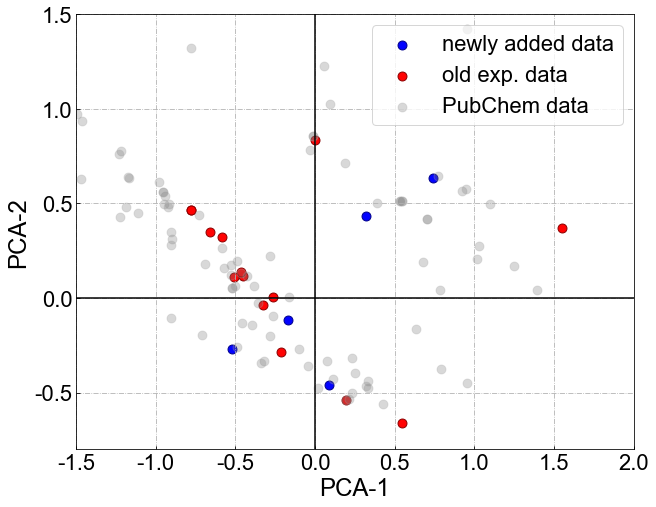

In [121]:
# existing data vs remaining data


plt.rcParams['font.sans-serif'] = ["Arial"]
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

# fs = 14

fig,ax = plt.subplots(1, 1, figsize=(10,8))
# cmap = plt.get_cmap('viridis', 20)

# c = np.arange(len(pca_new_data))# Choose which column is shown as the superimposed color
ax.scatter(pca_new_data[:,0], pca_new_data[:,1], marker = 'o', c='b', 
           alpha =0.99, edgecolors = 'darkblue', 
           s = 80,label='newly added data')  
ax.scatter(pca_existing_data[:,0], pca_existing_data[:,1], 
           marker = 'o', c='r', alpha =0.99, edgecolors = 'darkred', 
           s = 80, label='old exp. data')

# ax.scatter(pca_liter[19:,0], pca_liter[19:,1], 
#            marker = 'o', c='green', alpha =0.3, edgecolors = 'darkgreen', 
#            s = 80, label='40 - 19 data')

ax.scatter(pca_pubchem[:,0], pca_pubchem[:,1], 
           marker = 'o', c='gray', alpha =0.3, edgecolors = 'darkgray', 
           s = 80, label='PubChem data')

ax.plot(np.arange(-2,3,0.1),np.arange(-2,3,0.1)*0, 'black')
ax.plot(np.arange(-2,3,0.1)*0,np.arange(-2,3,0.1), 'black')

# title = 'PCA'
# ax.set_title(''+title, fontsize = fs)
# fig.colorbar(im, ax=ax, drawedges=False)

ax.set_xlabel('PCA-1', fontsize = 24)
ax.set_ylabel('PCA-2', fontsize = 24)
plt.legend(fontsize = 22)
ax.set_xlim(-1.5, 2)
ax.set_ylim(-0.8, 1.5)
ax.tick_params(direction='in', labelsize = 22)
ax.grid(True, linestyle='-.')
plt.show()

In [122]:
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# # 归一化
# scaler = MinMaxScaler()
# scaler.fit(pubchem_materials_data)
# thirty_eight_material_data_scaled = scaler.transform(thirty_eight_material_data)
# nineteen_exp_data_scaled = scaler.transform(nineteen_exp_data)
# pubchem_materials_data_scaled = scaler.transform(pubchem_materials_data)

# pca = PCA(n_components=2) #实例化
# pca = pca.fit(pubchem_materials_data_scaled) #拟合模型
# #pca = pca.fit(nineteen_exp_data_scaled) #拟合模型

# pca_38 = pca.transform(thirty_eight_material_data_scaled) #获取新矩阵
# pca_19 = pca.transform(nineteen_exp_data_scaled) #获取新矩阵
# pca_pubchem = pca.transform(pubchem_materials_data_scaled) #获取新矩阵

# pca_existing_data = pca_19[:14,:]
# pca_new_data = pca_19[14:,:]

In [123]:
# # existing data vs remaining data


# plt.rcParams['font.sans-serif'] = ["Arial"]
# # plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus']=False

# # fs = 14

# fig,ax = plt.subplots(1, 1, figsize=(10,8))
# # cmap = plt.get_cmap('viridis', 20)

# # c = np.arange(len(pca_new_data))# Choose which column is shown as the superimposed color
# ax.scatter(pca_new_data[:,0], pca_new_data[:,1], marker = 'o', c='b', 
#            alpha =0.99, edgecolors = 'darkblue', 
#            s = 80,label='newly added data')  
# ax.scatter(pca_existing_data[:,0], pca_existing_data[:,1], 
#            marker = 'o', c='r', alpha =0.99, edgecolors = 'darkred', 
#            s = 80, label='old exp. data')

# # ax.scatter(pca_38[19:,0], pca_38[19:,1], 
# #            marker = 'o', c='green', alpha =0.3, edgecolors = 'darkgreen', 
# #            s = 80, label='40 - 19 data')

# ax.scatter(pca_pubchem[:,0], pca_pubchem[:,1], 
#            marker = 'o', c='gray', alpha =0.3, edgecolors = 'darkgray', 
#            s = 80, label='PubChem data')

# ax.plot(np.arange(-2,3,0.1),np.arange(-2,3,0.1)*0, 'black')
# ax.plot(np.arange(-2,3,0.1)*0,np.arange(-2,3,0.1), 'black')

# # title = 'PCA'
# # ax.set_title(''+title, fontsize = fs)
# # fig.colorbar(im, ax=ax, drawedges=False)

# ax.set_xlabel('PCA-1', fontsize = 24)
# ax.set_ylabel('PCA-2', fontsize = 24)
# plt.legend(fontsize = 22)
# ax.set_xlim(-1.5, 2)
# ax.set_ylim(-0.8, 1.5)
# ax.tick_params(direction='in', labelsize = 22)
# ax.grid(True, linestyle='-.')
# plt.show()

# Feature Correlation

### Literature Data Correlation 

/var/folders/j8/w8372sqd3fbgsmllt2yj0ms40000gn/T/ipykernel_5952/3637226317.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)


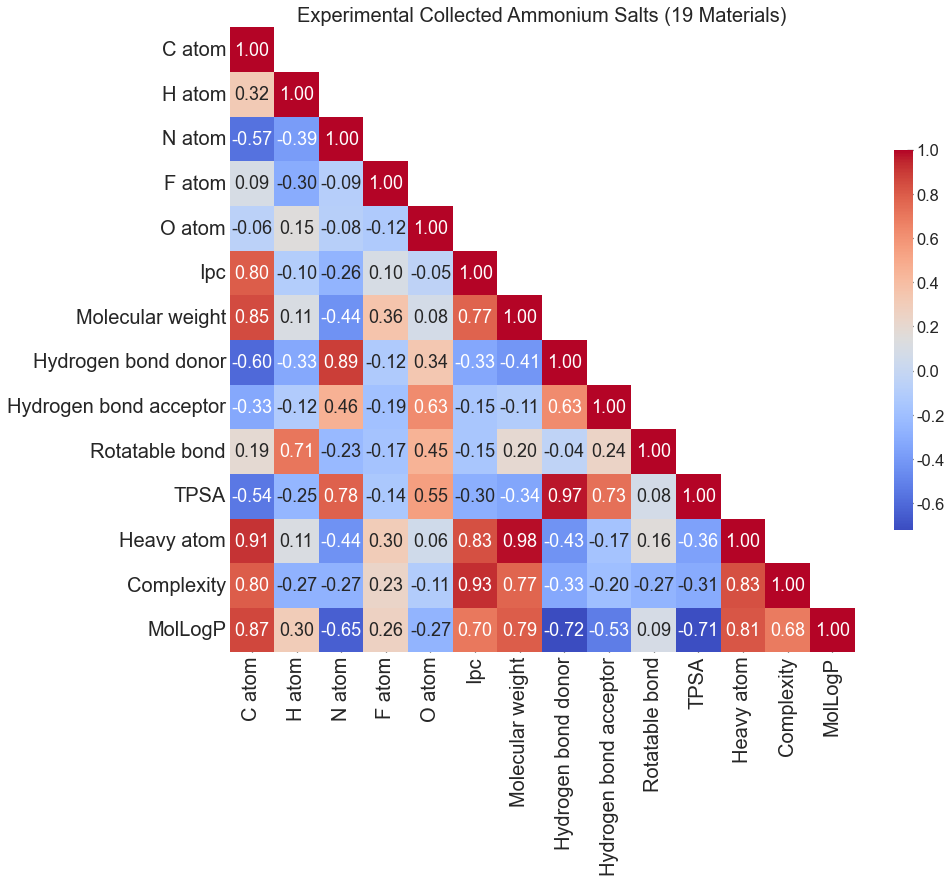

In [133]:
# PubChem数据的特征相关性
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nineteen_exp_data_scaled = pd.DataFrame(nineteen_exp_data_scaled)
nineteen_exp_data_scaled.columns=nineteen_exp_data.columns
df_cols = nineteen_exp_data.columns
corr = nineteen_exp_data_scaled.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)
fs = 20

fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f',
            cmap=cmap, cbar=True, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
# ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
ax.set_title("Experimentally Collected Ammonium Salts (19 Materials)", fontsize = 20)

plt.xticks(rotation=90, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs)
plt.show()

/var/folders/j8/w8372sqd3fbgsmllt2yj0ms40000gn/T/ipykernel_5952/2788597174.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)


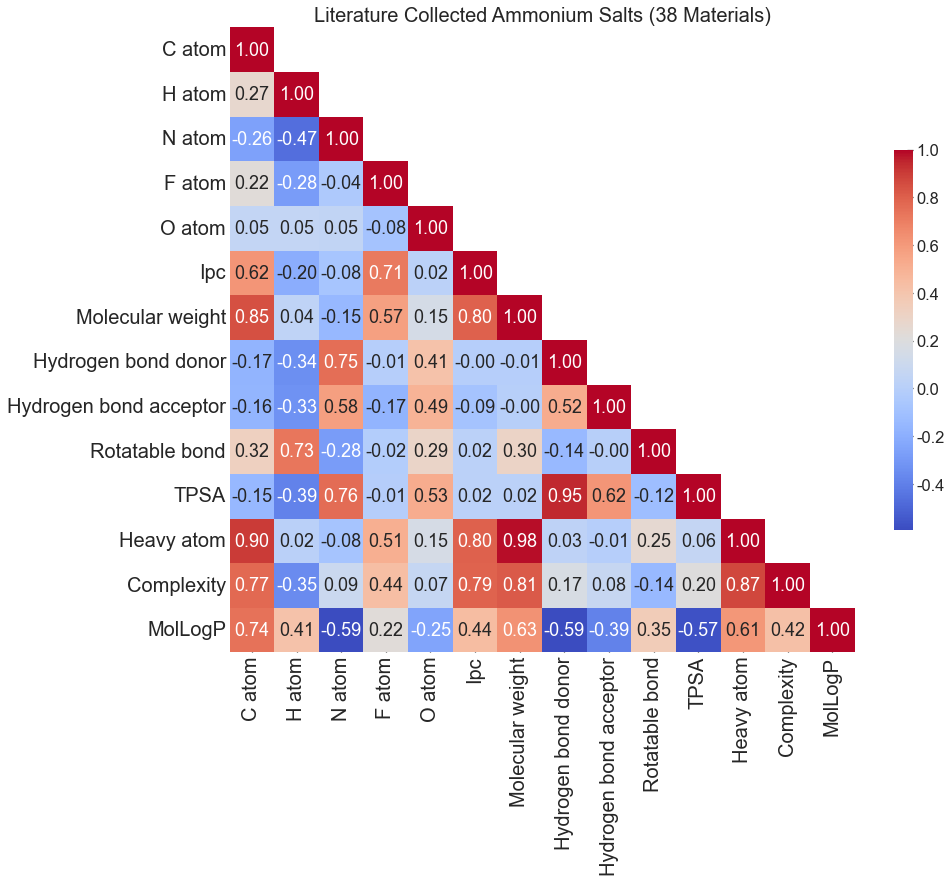

In [134]:
# 38组数据的特征相关性
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

literature_material_data_scaled = pd.DataFrame(literature_material_data_scaled)
literature_material_data_scaled.columns=literature_material_data.columns
df_cols = thirty_eight_material_data.columns
corr = literature_material_data_scaled.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)
fs = 20

fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f',
            cmap=cmap, cbar=True, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
# ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
ax.set_title("Literature Collected Ammonium Salts (38 Materials)", fontsize = 20)

plt.xticks(rotation=90, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs)
plt.show()

### PubChem Data Correlation 

/var/folders/j8/w8372sqd3fbgsmllt2yj0ms40000gn/T/ipykernel_5952/1570412620.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)


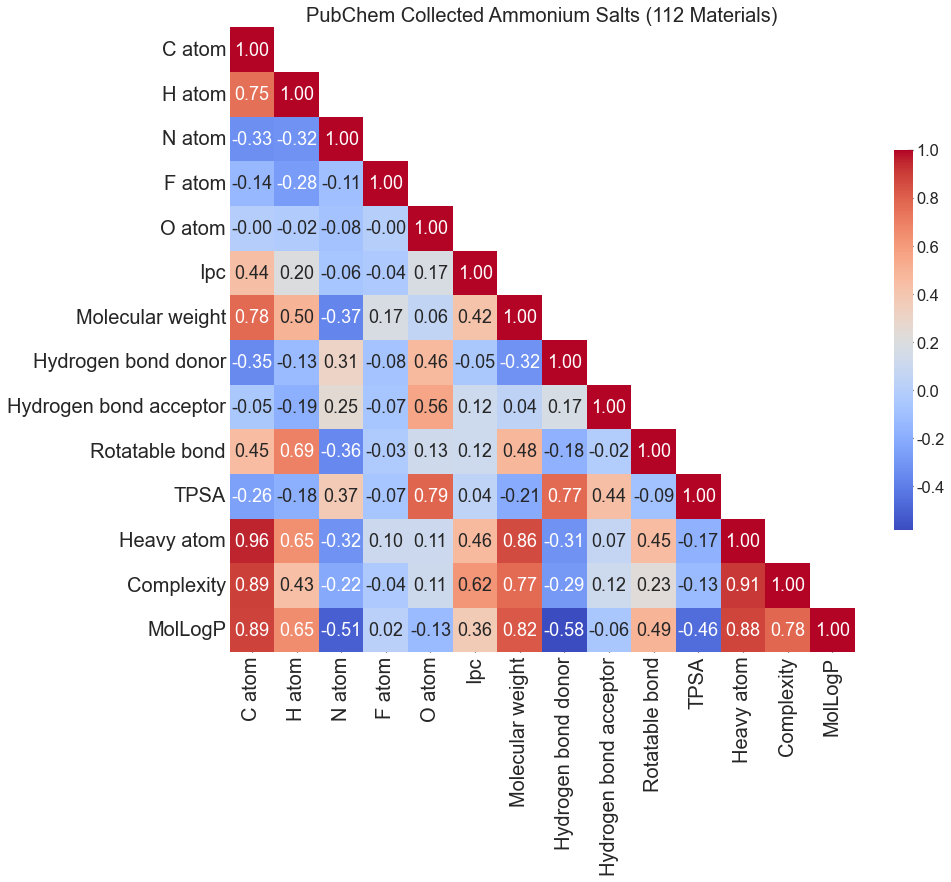

In [135]:
# PubChem数据的特征相关性
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pubchem_materials_data_scaled = pd.DataFrame(pubchem_materials_data_scaled)
pubchem_materials_data_scaled.columns=pubchem_materials_data.columns
df_cols = pubchem_materials_data.columns
corr = pubchem_materials_data_scaled.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)
fs = 20

fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f',
            cmap=cmap, cbar=True, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
# ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
ax.set_title("PubChem Collected Ammonium Salts (112 Materials)", fontsize = 20)

plt.xticks(rotation=90, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs)
plt.show()